# Day1

* K-최근접 이웃, 선형회귀, 다항회귀

## K-최근접 이웃 (K-Nearest Neighbor)
* 비슷한 특성을 가진 데이터는 비슷한 범주에 속하는 경향이 있다는 가정하에 사용
* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 다양한 레이블의 데이터 중에서, 자신과 가까운 데이터를 찾아 자신의 레이블을 결정하는 방식
* 비매개변수 머신러닝 모델
* 분류와 회귀 모두 지원
* 비지도 학습의 가장 간단한 예시
* 줄여서 KNN이라고 표시
* k개의 가장 가까운 훈련 인스턴스를 골라 가장 많은 레이블을 분류로 선택
* 단순히 훈련 데이터셋을 저장하는 것이 모델을 만드는 과정의 전부
* 훈련 단계에서 학습을 하지 않기 때문에 "게으른 학습"이라 부름
* 테스트/검증 단계에서 테스트 관측값과 가장 근접한 훈련 관측값을 비교
* 거리에만 의존하므로 차원의 저주에 따라 예측에 필요한 특징의 개수가 늘어나면 성능이 크게 저하됨.
---
* K: 최근접 점을 몇 개까지 볼 것인가, 기본적으로 작은 홀수로 사용
* 최근접점을 구하는 방법: 유클리드 공간의 점과 점 사이의 직선거리를 이용
* k에 따라 분류가 달라질 수 있음
* 최선의 k를 선택하는 것은 데이터마다 다르게 접근해야 하는데, 일반적으로는 총 데이터 수의 제곱근을 사용
---
* 주의할 점
    * 거리 기반 알고리즘을 사용할 땐 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없음. 일정한 기준으로 맞춰줘야 함.
    * 특징의 표준화된 크기 조절(스케일링) 필요
    * 주로 최소-최대 정규화, Z-점수 표준화 사용
    * 최소-최대 정규화는 테스트셋의 최소/최대가 범위를 벗어나는 경우가 생길 수 있기 때문에, 주로 Z-점수 표준화 사용
* 최소-최대 정규화: 변수 X의 범위를 0%에서 100%까지로 나타내는 방식
* Z-점수 표준화: 변수 X의 범위를 평균으로부터 몇 표준편차만큼 떨어져 있는지를 관점으로 변수를 확대/축소시키는 방식
---
* 차원의 저주
    * 차원이 증가하면서 학습데이터 수가 차원 수보다 적어져서 성능이 저하되는 현상
    * 차원이 증가할수록 변수가 증가하고, 개별 차원 내에서 학습할 데이터 수가 적어짐.

### K-최근접 이웃 분류
* 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하고, 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측

### K-최근접 이웃 회귀 (KNN Regression)

* 임의의 어떤 숫자를 예측
* 이웃 수치들의 평균을 사용
* 예측 값을 평가하기 위해 결정계수(coefficient of determination)를 사용 = R^2
* R^2 = 1 - {(타겟-예측)^2의 합/(타겟-평균)^2의 합}
* 타겟의 평균 정도를 예측하는 수준이라면 0에 가까워지고, 예측이 타겟에 아주 가까워지면 1에 가까운 값을 갖게 됨
* 테스트하고자 하는 샘플에 근접한 훈련 데이터가 없는 경우, 즉 훈련 셋의 범위를 많이 벗어나는 샘플인 경우 정확하게 예측하기 어려움

## 선형 회귀 (Linear Regression)
* 회귀에서 가장 널리 사용되는 성능 측정 지표: 평균 제곱근 오차 (RMSE)
* 선형 회귀 모델을 훈련시키려면, RMSE를 최소화하는 theta를 찾아야 함.

### 경사 하강법 (Grandient Descent)
* 기본 아이디어: 비용 함수 (cost function)를 최소화하기 위해 반복해서 파라미터를 조정하는 것
* 파라미터 벡터 theta에 대해 현재 gradient를 계산하고, 감소하는 방향으로 진행 (0에 도닥한 경우 = 최솟값에 도달)
* 경사 하강법의 가장 중요한 파라미터는 step의 크기 = 학습률 (learning rate)  **하이퍼 파라미터
* 학습률이 너무 작으면?: 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
* 학습률이 너무 크면?: 알고리즘이 더 큰 값으로 발산할 수 있음
* 경사 하강법의 두 가지 문제: Global minimum, Local minimum

### 배치 경사 하강법 (Batch Gradient Descent)
* 전체 데이터셋에 대해 오차를 구한 뒤, 기울기를 한 번만 계산하여 모델의 파라미터 업데이트
* 1 Epoch 당 1회 업데이트
* 전체 데이터를 모두 한 번에 처리하기 때문에 메모리가 많이 필요

### 확률적 경사 하강법 (Stochastic Gradient Descent)
* 추출된 데이터 한 개에 대해서 그래디언트를 계산하고, 경사 하강 알고리즘을 적용하는 방법
* 전체 데이터 중 하나의 데이터를 무작위로 선택하여 그 샘플에 대한 그래디언트를 계산
* 매 반복에서 매우 적은 데이터만 처리하기 때문에 알고리즘이 매우 빠름
* 매 반복에서 하나의 샘플만 있으면 되므로, 매우 큰 훈련 세트로 훈련 가능
* GDB 보다 매우 불안정
* cost function이 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소
* Global minimum에 다다르지 못할 가능성 높음

### 미니 배치 경사 하강법 (Mini Batch Gradient Descent)
* BGD와 SGD의 절충안
* 전체 데이터를 batch size개씩 나누어 배치로 학습 (batch size는 하이퍼 파라미터)
* mini bacth라 부르는 임의의 작은 샘플 세트에 대해 gradient 계산
* 행렬 연산에 최적화된 하드웨어(GPU)를 사용해서 얻는 성능 향상
* mini batch를 어느 정도 크게 하면 SGD보다 덜 불규칙하게 움직임. 즉, SGD보다 최솟값에 더 가까이 도달하게 될 것

## 다항회귀 (Polynomial Regression)
* 독립변수의 차수를 높이는 형태. 차수가 높아질수록 복잡한 다항식을 이용해 모델 구현 가능
* 단순 선형 모델의 한계를 어느 정도 극복 가능
* overfitting 초래 가능성 존재. 차수가 높게 지정될수록, 학습데이터에만 피팅 되어 새로운 데이터에 대해 예측 정확도가 떨어지는 현상 발생

## Train set & Test set
* 머신러닝 알고리즘의 성능을 제대로 평가하려면, 훈련데이터와 평가에 사용할 데이터가 달라야 함
* 평가에 사용하는 데이터를 test set, 훈련에 사용되는 데이터를 train set이라고 함

### 훈련 세트와 테스트 세트

In [1]:
# 생선의 길이 (도미, 빙어)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 생선의 무게 (도미, 빙어)
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
              500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
              700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
              7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 각 생선에 대해서 길이와 무게를 짝지어 줌
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

# 도미(35마리): 1, 빙어(14마리): 0
fish_target = [1] * 35 + [0] * 14

In [3]:
# 사이킷런에서 KNeighborsClassifier를 import 해줌
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 클래스 인스턴스 생성
kn = KNeighborsClassifier()

In [4]:
# 인덱스 번호가 4인 데이터를 출력 = 5번째 데이터
print(fish_data[4])

[29.0, 430.0]


In [5]:
# 인덱스 번호가 0!4인 데이터를 출력
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [6]:
# 훈련 세트로 입력값 중 0~34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0~34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35~ 마지막 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35~ 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [7]:
# fit() 메서드를 통해 모델을 훈련함
kn = kn.fit(train_input, train_target)

# score() 메서드를 호출해 평가
# 0이 출력되며 성능이 더 저하된 것을 알 수 있음
kn.score(test_input, test_target)

0.0

### 넘파이

In [8]:
# 넘파이 불러오기
import numpy as np

In [9]:
# fish_data를 넘파이 배열 형태로 변환
input_arr = np.array(fish_data)

# fish_target를 넘파이 배열 형태로 변환
target_arr = np.array(fish_target)

In [10]:
# input_arr 배열 출력
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [11]:
# input_arr의 배열의 형태를 shape을 통해 알 수 있음
# 49개(도미, 빙어)의 샘플과 2개(길이, 무게)의 특성
print(input_arr.shape)

(49, 2)


In [12]:
# 넘파이에서 무작위 결과를 만드는 함수는 실행마다 다른 결과를 도출
# 일정한 결과를 얻기 위해 랜덤시드 지정해야 함. 랜덤시드 42로 설정
np.random.seed(42)

# 0~48까지 1씩 증가하는 인덱스를 만듦
index = np.arange(49)

# shuffle() 함수를 사용해서 배열을 무작위로 섞음
np.random.shuffle(index)

In [13]:
# 섞인 배열 출력
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [14]:
# 넘파이는 배열 인덱싱 기능을 제공
# [1, 3]은 인덱스 번호 1, 3에 해당하는 데이터(2, 4번째 데이터) 출력
# 리스트 대신 넘파이 배열을 인덱스로 전달할 수 있음
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [15]:
# input_arr에 index의 0~34번째 인덱스에 해당하는 리스트를 슬라이싱 함
# 위 값을 train_input이 할당 받음
# 훈련 세트 준비
train_input = input_arr[index[:35]]

# target_arr에 index의 0 ~34번째 인덱스에 해당하는 리스트를 슬라이싱 함
# 위 값을 train_target이 할당 받음
# 훈련 세트 준비
train_target = target_arr[index[:35]]

In [16]:
# 해당 인덱스 값 출력
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [17]:
# input_arr에 index의 35 ~ 마지막 번째 인덱스에 해당하는 리스트를 슬라이싱 함
# 위 값을 test_input이 할당 받음
# 테스트 세트 준비
test_input = input_arr[index[35:]]

# input_arr에 index의 35 ~ 마지막 번째 인덱스에 해당하는 리스트를 슬라이싱 함
# 위 값을 test_target이 할당 받음
# 테스트 테스 준비
test_target = target_arr[index[35:]]

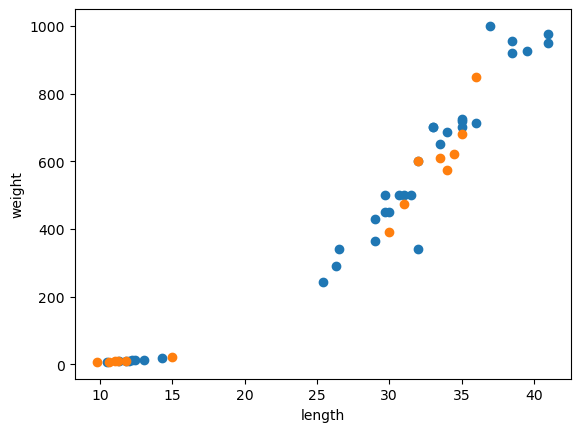

In [18]:
# 시각화를 위해 matplotlib에서 pyplot을 import
import matplotlib.pyplot as plt

# 훈련 데이터 산점도
plt.scatter(train_input[:, 0], train_input[:, 1])

#테스트 데이터 산점도
plt.scatter(test_input[:, 0], test_input[:, 1])

# x축 라벨
plt.xlabel("length")

# y축 라벨
plt.ylabel("weight")

# 출력
plt.show()

### 두 번째 머신러닝 프로그램

In [19]:
# 앞서 만든 훈련 세트와 테스트 세트로 K-최근접 이웃 모델을 훈련
kn = kn.fit(train_input, train_target)

In [20]:
# score() 메서드로 정확도를 출력
# 1.0으로 모두 맞힘
kn.score(test_input, test_target)

1.0

In [21]:
# test_input의 예측값 출력
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [22]:
# 정답 출력
# test_input의 예측 값과 모두 일치
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 데이터 전처리

### 넘파이로 데이터 준비하기

In [23]:
# 생선의 길이 (도미, 빙어)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 생선의 무게 (도미, 빙어)
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
              500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
              700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
              7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [24]:
# 넘파이 불러오기
import numpy as np

In [25]:
# column_stack() 함수는 매개변수를 받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
# 연결할 리스트는 튜플 형태로 전달
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [26]:
# fish_length와 fish_weight를 column_stack() 함수에 전달
fish_data = np.column_stack((fish_length, fish_weight))

In [27]:
# 앞의 5개의 데이터 출력
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [28]:
# 모든 원소가 1인 5개의 원소를 넘파이 배열로 출력
# np.zeros()는 np.ones()와 유사하게 원소가 0인 것을 넘파이 배열로 출력
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [29]:
# 1이 35개인 배열과 0이 14개인 배열을 만든 다음, np.concatenate() 함수를 사용
# np.concatenate() 는 첫 번째 차원을 따라 배열을 연결함
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [30]:
# fish_target 출력
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [31]:
# train_test_split 함수는 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나눠줌
# 이전처럼 직접 인덱스를 섞어서 훈련 세트와 테스트 세트로 나눌 필요가 없음
from sklearn.model_selection import train_test_split

In [32]:
# fish_data를 train_input과 test_input으로 2개의 배열로 나눔
# fish_target를 train_target와 test_target으로 나눔
# 기본적으로 25%를 테스트 세트로 설정
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [33]:
# train_input과 test_input 형태 출력
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [34]:
# train_target과 test_target 형태 출력
print(train_target.shape, test_target.shape)

(36,) (13,)


In [35]:
# 도미와 빙어가 잘 섞였는지 알기 위해 test_target 출력
# 13개의 테스트 세트 중에 10개가 도미(1), 3개가 빙어(0)로 비율이 3,3:1
# 원래 비율은 35:14로 2.5:1으로 샘플링 편향이 존재
# 샘플링 편향이 있어 훈련 세트와 테스트 세트에 비율이 일정하지 않다면, 모델이 일부 샘플을 올바르게 학습할 수 없음
# 해결 방법으로 stratify 매개변수에 타겟 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
# stratify 매개변수에 타깃 데이터 전달
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [37]:
# 다시 test_target 출력
# 데이터가 작아 전체 훈련 데이터의 비율과 동일하지 않지만, 2.25:1로 훈련 데이터의 비율과 유사
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [38]:
# 사이킷런에서 KNeghborsClassifier 불러오기
from sklearn.neighbors import KNeighborsClassifier

# 객체 선언
kn = KNeighborsClassifier()

# train_input 데이터와 train_target 데이터로 모델 학습
kn.fit(train_input, train_target)

# score() 메서드로 점수 출력
kn.score(test_input, test_target)

1.0

### 수상한 도미 한 마리

In [39]:
# 도미의 데이터를 넣고 결과 확인
# 결과는 빙어(0)
print(kn.predict([[25, 150]]))

[0.]


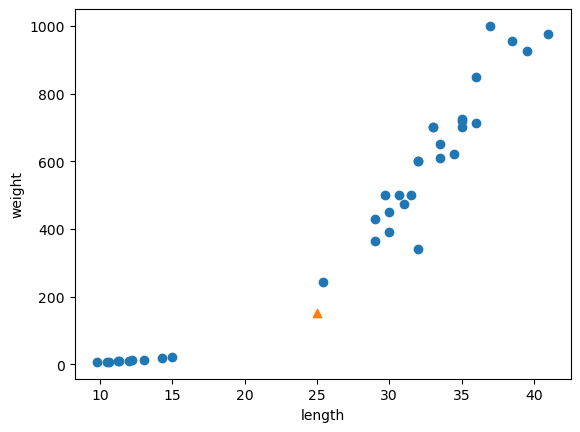

In [40]:
# 도미와 빙어 데이터를 산점도로 표시
plt.scatter(train_input[:, 0], train_input[:, 1])

# 주황색 세모 표시
plt.scatter(25, 150, marker = '^')

# x축 라벨
plt.xlabel("length")

# y축 라벨
plt.ylabel("weight")

# 출력
plt.show()

In [41]:
# KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 메세드 제공
# 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환
# KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환
distances, indexes = kn.kneighbors([[25, 150]])

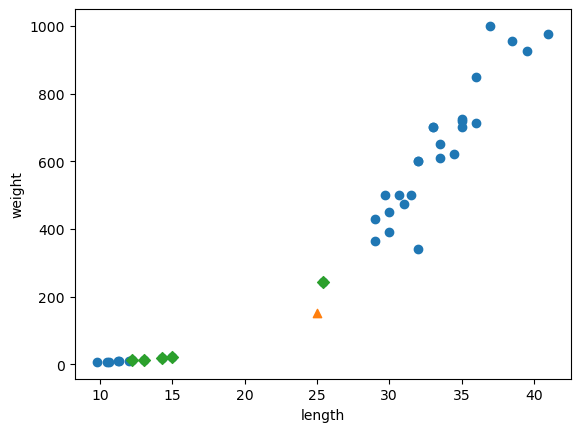

In [42]:
# 도미와 빙어 데이터를 산점도로 표시
plt.scatter(train_input[:, 0], train_input[:, 1])

# 주황색 세모 표시
plt.scatter(25, 150, marker = '^')

# marker = 'D'를 통해, 다이아몬드로 indexes에 있는 원소에 해당하는 데이터를 산점도로 표시
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')

# x축 라벨
plt.xlabel("length")

# y축 라벨
plt.ylabel("weight")

# 출력
# 4개의 빙어, 1개의 도미
plt.show()

In [43]:
# train_input[indexes] 데이터 출력
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [44]:
# train_target[indexes] 데이터 출력
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [45]:
# kneighbors() 메서드에서 반환한 distances 배열을 출력
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 기준을 맞춰라

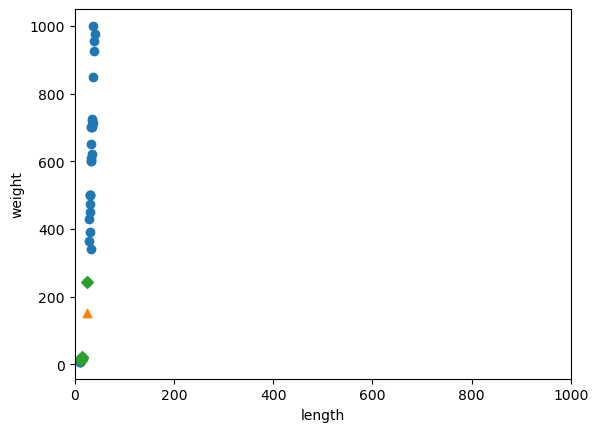

In [46]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')

# x축 범위 0~1000으로 맞춤
plt.xlim((0, 1000))

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# x축과 y축의 범위를 동일하게 맞추니, 데이터가 수직으로 늘어선 형태를 보임
# 이는 생선의 길이(x축)는 가장 가까운 이웃을 찾는데 크게 영향을 못 줌
# 오로지 생선의 무게(y축)만을 고려 -> 특성값을 일정한 기준으로 맞추는 데이터 전처리 필요
# 전처리 방법 중 하나인 표준점수(standard score) 사용

In [47]:
# np.mean()로 평균을 계산
mean = np.mean(train_input, axis = 0)

# np.std()로 표준편차 계산
std = np.std(train_input, axis = 0)

# train_input은 (36, 2) 크기의 배열
# axis = 0을 통해 행을 따라 각 열의 통계 값을 계산

In [48]:
# 평균과 표준 편차 출력
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [49]:
# 표준 점수를 알기 위해 원본 데이터에서 평균을 빼고 표준편차로 나눔
train_scaled = (train_input - mean) / std

### 전처리 데이터로 모델 훈련하기

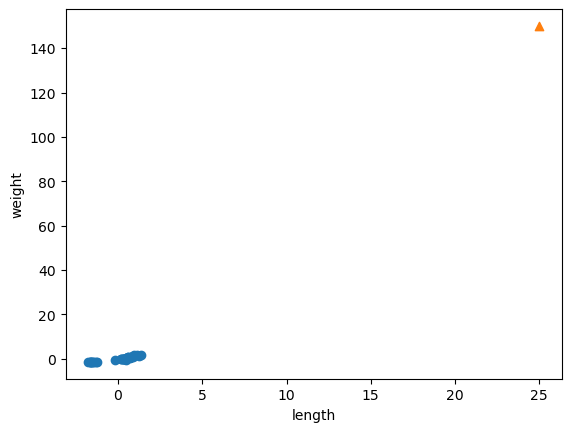

In [50]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

# 주황색 세모
plt.scatter(25, 150, marker = '^')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 샘플 [20, 150]을 표준점수로 변환하지 않았기 때문에, 주황색 세모가 덩그러니 있음

In [51]:
# 표준점수화
new = ([25, 150] - mean) / std

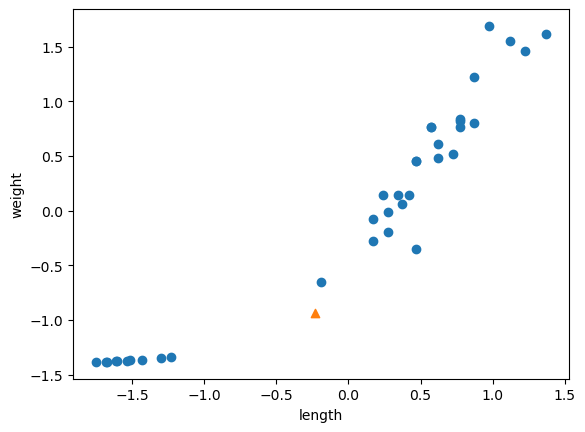

In [52]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 표준점수화한 데이터를 다시 출력
# x축과 y축의 범위가 -1.5 ~ 1.5 사이로 바뀜

In [53]:
# 모델을 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [54]:
# 테스트 세트 또한 표준점수화로 데이터 전처리 진행
test_scaled = (test_input - mean) / std

In [55]:
# score()을 통해 점수 출력
# 1.0으로 전부 정답
kn.score(test_scaled, test_target)

1.0

In [56]:
# 이전 빙어가 나온 데이터를 다시 적용하기 도미(1)로 출력
print(kn.predict(([new])))

[1.]


In [57]:
# kneighbors로 k-최근접 이웃을 구함
distances, indexes = kn.kneighbors([new])

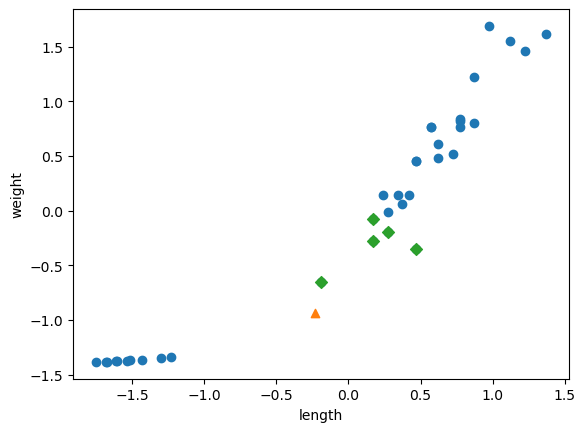

In [58]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

# 주황색 세모
plt.scatter(new[0], new[1], marker = '^')

# 주황색 세모와 가까운 5개의 이웃을 녹색 다이아로 출력
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## K-최근접 이웃 회귀

### 데이터 준비

In [59]:
import numpy as np

In [60]:
# 넘파이 배열의 농어 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 25.6,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )

# 넘파이 배열의 농어 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
    )

In [61]:
import matplotlib.pyplot as plt

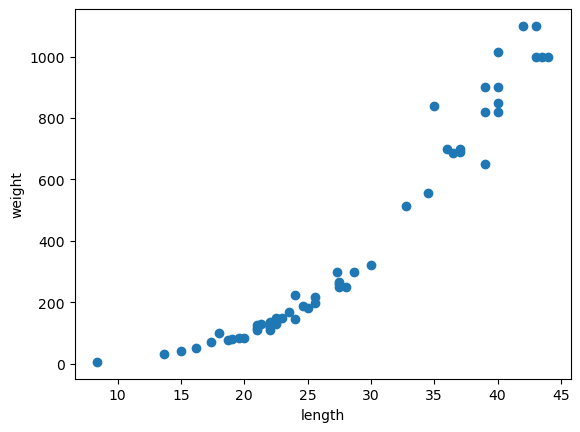

In [62]:
# 농어의 길이와 무게를 산점도로 표현
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [63]:
# 훈련 세트와 테스트 세트를 나누기 위한 train_test_split 사용
from sklearn.model_selection import train_test_split

In [64]:
# train_test_split() 함수를 사용해 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [65]:
# train_input과 test_input shape 출력
print(train_input.shape, test_input.shape)

(42,) (14,)


In [66]:
# test_array shape 출력
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [67]:
# reshape를 통해 (2, 2) 크기가 나오도록 설정
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [68]:
# 아래의 코드를 주석을 제거하고 실행하면 에러가 발생
# 2x3 = 6개의 원소 -> 원본과 원소의 개수가 다르므로 error 발생
# test_array = test_array.reshape(2, 3)

In [69]:
# reshape(-1, 1)을 통해 두 번째 크기를 1로 설정하고, -1로 설정된 곳에 나머지 원소 개수로 채움
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [70]:
# reshape된 train_input, test_input shape 출력
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수 (R^2)

In [71]:
# KNeighborsRegressor: 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현하는 클래스
from sklearn.neighbors import KNeighborsRegressor

In [72]:
# k-최근접 이웃 회귀 모델을 출력
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [73]:
# score을 출력
knr.score(test_input, test_target)

0.9928066734257411

In [74]:
# mean_absolute_error: 타깃과 예측의 절댓값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

In [75]:
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)

# mae 출력
print(mae)

19.185714285714287


### 과대적합(overfitting) vs. 과소적합(underfitting)

In [76]:
# score 출력
print(knr.score(train_input, train_target))

# 훈련한 모델을 사용해 훈련 세트의 R^2 점수 확인
# -> 훈련 세트보다 테스트 세트의 점수가 높음 -> 과소적합 (underfitting)

0.9697686836408022


In [77]:
# 모델을 조금 더 복잡하게 만들면 해결 가능 -> 이웃의 개수 k를 줄이자

# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

# score 출력
print(knr.score(test_input, test_target))

0.9757093360324991


## 선형 회귀

### K-최근접 이웃의 한계

In [78]:
# 길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))

# 하지만 실제 무게는 더 무겁다?
# K-최근접 이웃 회귀를 사용해서 농어의 무게를 예측했을 때 발생하는 큰 문제는 훈련 세트의 범위 밖의 샘플을 예측할 수 없다는 점
# 아무리 멀리 떨어져 있더라도 무조건 가까운 샘플의 타깃을 평균하여 예측

[1033.33333333]


In [79]:
import matplotlib.pyplot as plt

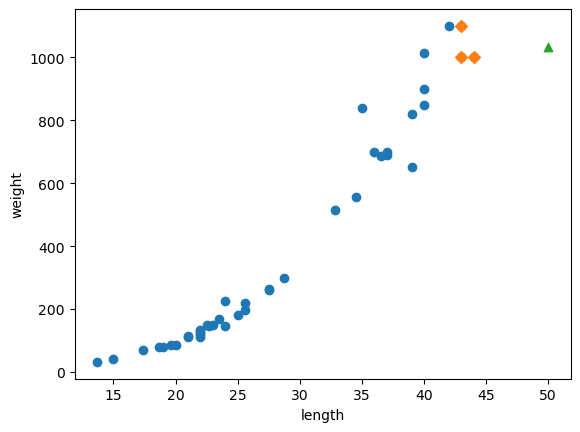

In [80]:
# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker = '^')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [81]:
# 이웃 샘플의 타깃 평균
print(np.mean(train_target[indexes]))

# 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에, K-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균

1033.3333333333333


In [82]:
# 길이가 100cm인 농어의 무게 예측 값
print(knr.predict([[100]]))

[1033.33333333]


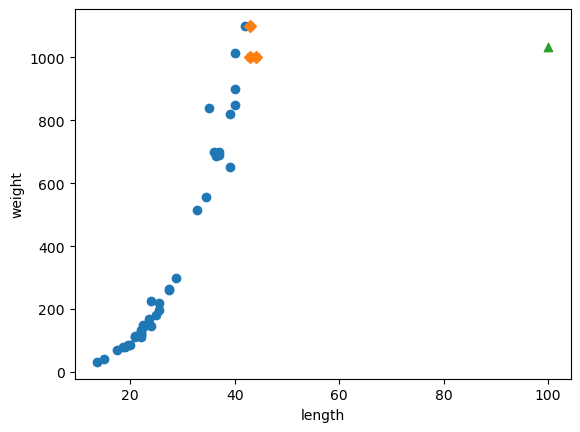

In [83]:
# 100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker = '^')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 농어가 아무리 커도 무게가 더 늘어나지 않는 문제 발생

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
# 선형 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [86]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1242.65504031]


In [87]:
# 회귀식의 coef_와 intercept_ 출력
# coef_, intercept_: 머신러닝 알고리즘이 찾은 값. 모델 파라미터
print(lr.coef_, lr.intercept_)

[39.01623449] -708.1566840933172


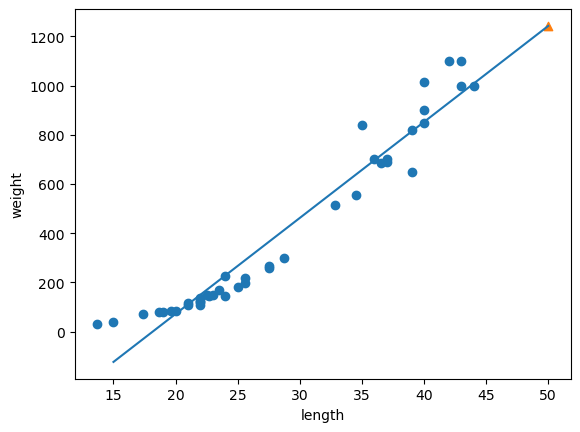

In [88]:
# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 50까지 1차방정식 그래프를 그림
plt.plot([15,  50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1242.7, marker = '^')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [89]:
# 훈련 세트와 테스트 세트에 대해 R^2 점수 확인

# 훈련 세트 score 출력
print(lr.score(train_input, train_target))

# 테스트 세트 score 출력
print(lr.score(test_input, test_target))

0.9410631399917372
0.8249526211943555


## 다항 회귀

In [90]:
# 최적의 직선보다 최적의 곡선 찾아보기
# 2차방정식의 그래프를 그리기 위해 길이의 제곱항을 훈련 세트에 추가

# train_input을 제곱한 것과 train_input 두 배열을 나란히 붙임
train_poly = np.column_stack((train_input ** 2, train_input))

# test_input을 제곱한 것과 test_input 두 배열을 나란히 붙임
test_poly = np.column_stack((test_input ** 2, test_input))

In [91]:
# train_poly와 test_poly shape 출력
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [92]:
# 다항식을 사용한 선형 회귀 = 다항 회귀

# 모델을 훈련
# 2차방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가
# 타겟 값을 그대로 사용
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 길이가 50cm인 농어의 무게 예측 값
print(lr.predict([[50**2, 50]]))

[1570.20048729]


In [93]:
# 다항 회귀식의 coef와 intercept 출력
print(lr.coef_, lr.intercept_)

[  1.00162444 -20.8127127 ] 106.77501229607998


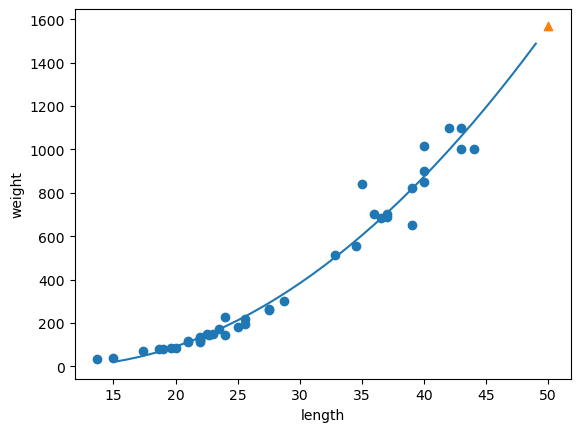

In [94]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 생성
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 49까지 2차방정식 그래프를 그림
plt.plot(point, 1.00*point**2 - 20.8*point + 106.78)

# 50cm 농어 데이터
plt.scatter([50], [1570], marker = '^')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [95]:
# R^2 점수 평가

# 훈련 세트 score 출력
print(lr.score(train_poly, train_target))

# 테스트 세트 score 출력
print(lr.score(test_poly, test_target))

0.9709609858055641
0.9773777953960313
